In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("../Week-4_Feature_Scaling/minmax_scaled_epl.csv")
df.head()


,Name,Jersey Number,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,...,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Club_encoded,Position_encoded
0,Bernd Leno,1.0,Germany,28.0,0.117100,28,16,0.068149,NaN,NaN,...,17.0,28.0,375.0,489.0,2,0,0,NaN,0,2
1,Matt Macey,33.0,England,26.0,0.150001,0,0,0.068149,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,NaN,0,2
2,Rúnar Alex Rúnarsson,13.0,Iceland,25.0,0.150001,0,0,0.068149,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0,0,NaN,0,2
3,Héctor Bellerín,2.0,Spain,25.0,0.295539,90,37,0.033520,NaN,0.0,...,NaN,NaN,NaN,NaN,23,0,125,8.0,0,0
4,Kieran Tierney,3.0,Scotland,23.0,0.027881,7,5,0.000000,NaN,0.0,...,NaN,NaN,NaN,NaN,2,0,9,0.0,0,0


In [2]:
X = df[['Appearances', 'Shots', 'Passes', 'Assists']]
y = df['Goals']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = lr.predict(X_test)


In [7]:
# Evaluation metrices

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.024506035175660332
RMSE: 0.03767836660846863
R2 Score: 0.6126753696195761


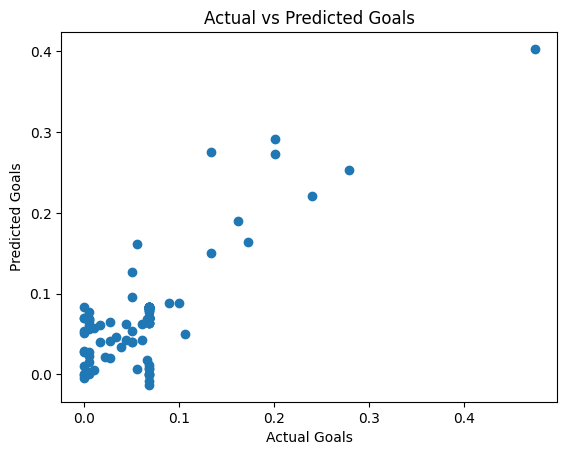

In [8]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()


In [9]:
df['Match_Result'] = df['Goals'].apply(
    lambda x: 2 if x > 1 else (1 if x == 1 else 0)
)


In [10]:
X_cls = df[['Shots', 'Passes', 'Assists']]
y_cls = df['Match_Result']


In [11]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)


In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xc_train, yc_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
yc_pred = log_reg.predict(Xc_test)


In [14]:
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("Precision:", precision_score(yc_test, yc_pred, average='weighted'))
print("Recall:", recall_score(yc_test, yc_pred, average='weighted'))
print("F1 Score:", f1_score(yc_test, yc_pred, average='weighted'))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


c:\Users\astut\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


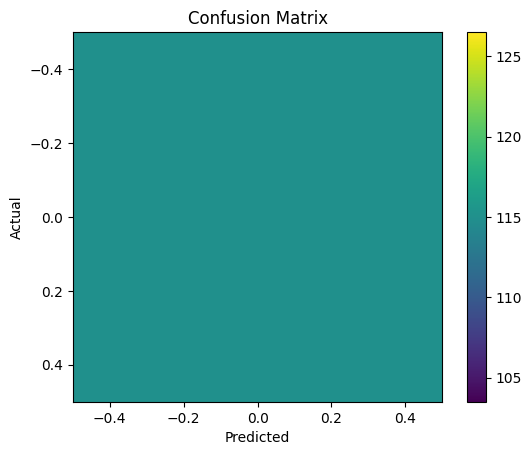

In [15]:
cm = confusion_matrix(yc_test, yc_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()
